In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

### ***DATA***

In [2]:
df=pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [9]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [11]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [12]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [13]:
x=df.drop(columns="Outcome",axis=1)
y=df['Outcome']

In [14]:
x.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


### ***Visualization***

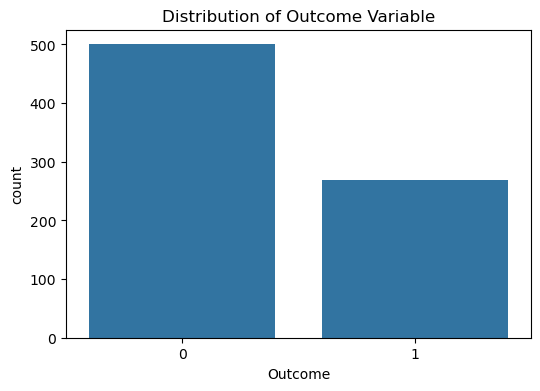

In [15]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=df)
plt.title('Distribution of Outcome Variable')
plt.show()

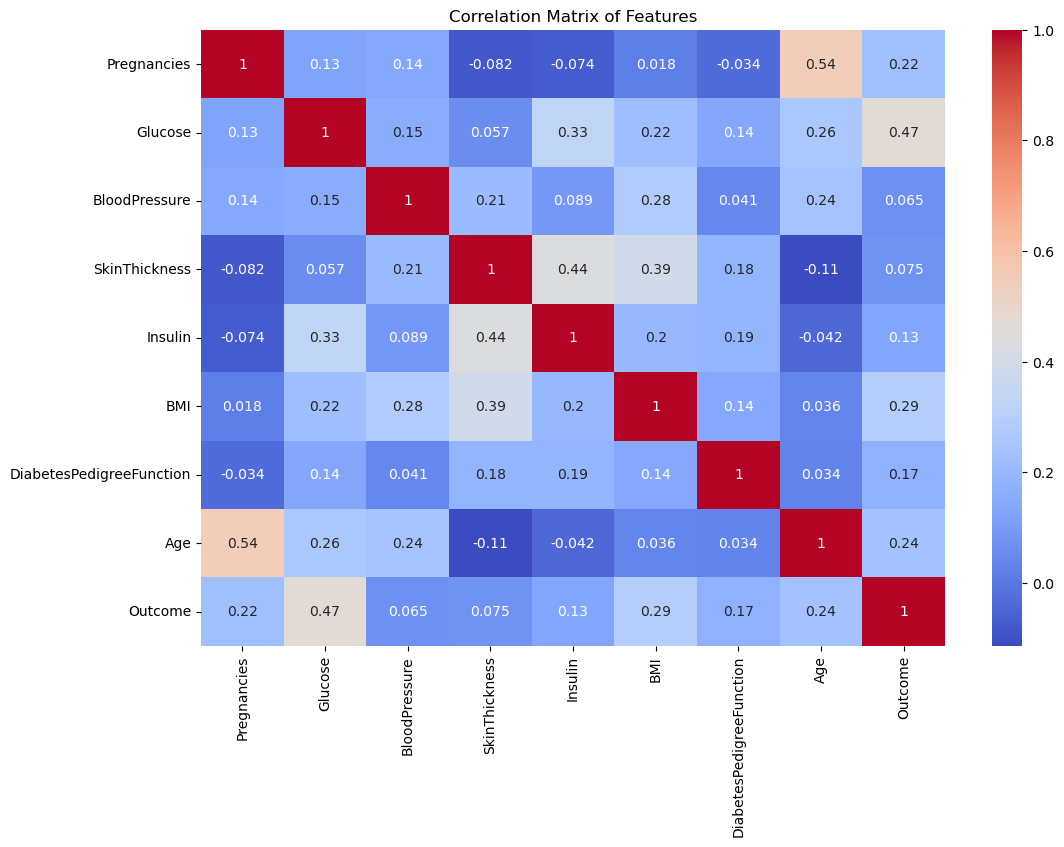

In [16]:
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

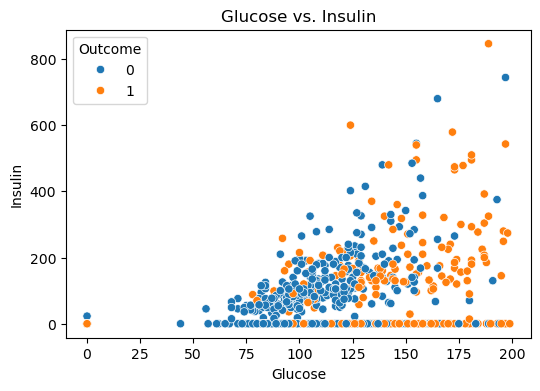

In [17]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Glucose', y='Insulin', hue='Outcome', data=df)
plt.title('Glucose vs. Insulin')
plt.show()

### ***Train & Test Model***

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=70)
print(x_train.shape)
print(x_test.shape)

(614, 8)
(154, 8)


### ***Training***



> **Support Vector Machine**



In [19]:
classifier= svm.SVC(kernel='linear')
classifier.fit(x_train,y_train)

SVC(kernel='linear')

In [20]:
x_train_prediction = classifier.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)
print('Accuracy score of the training data : ', training_data_accuracy)
x_test_prediction = classifier.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the training data :  0.7899022801302932
Accuracy score of the test data :  0.7272727272727273


> **Logistic Regression**

In [21]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(x_train, y_train)
log_x_train_prediction = log_model.predict(x_train)
log_training_data_accuracy = accuracy_score(log_x_train_prediction, y_train)
log_x_test_prediction = log_model.predict(x_test)
log_test_data_accuracy = accuracy_score(log_x_test_prediction, y_test)

In [22]:
print('Logistic Regression Accuracy score of the training data : ', log_training_data_accuracy)
print('Logistic Regression Accuracy score of the test data : ', log_test_data_accuracy)

Logistic Regression Accuracy score of the training data :  0.7899022801302932
Logistic Regression Accuracy score of the test data :  0.7467532467532467


> **Decision** **Tree**

In [23]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(x_train, y_train)
dt_x_train_prediction = dt_classifier.predict(x_train)
dt_training_data_accuracy = accuracy_score(dt_x_train_prediction, y_train)
dt_x_test_prediction = dt_classifier.predict(x_test)
dt_test_data_accuracy = accuracy_score(dt_x_test_prediction, y_test)

In [24]:
print('Decision Tree Accuracy score of the training data : ', dt_training_data_accuracy)
print('Decision Tree Accuracy score of the test data : ', dt_test_data_accuracy)

Decision Tree Accuracy score of the training data :  1.0
Decision Tree Accuracy score of the test data :  0.6948051948051948




> **Random Forest**



In [25]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(x_train, y_train)

rf_x_train_prediction = rf_classifier.predict(x_train)
rf_training_data_accuracy = accuracy_score(rf_x_train_prediction, y_train)
rf_x_test_prediction = rf_classifier.predict(x_test)
rf_test_data_accuracy = accuracy_score(rf_x_test_prediction, y_test)

In [26]:
print('Random Forest Accuracy score of the training data : ', rf_training_data_accuracy)
print('Random Forest Accuracy score of the test data : ', rf_test_data_accuracy)

Random Forest Accuracy score of the training data :  1.0
Random Forest Accuracy score of the test data :  0.7532467532467533




> **Adaboost**



In [27]:
from sklearn.ensemble import AdaBoostClassifier

ada_classifier = AdaBoostClassifier(n_estimators=50, random_state=42)
ada_classifier.fit(x_train, y_train)

ada_x_train_prediction = ada_classifier.predict(x_train)
ada_training_data_accuracy = accuracy_score(ada_x_train_prediction, y_train)
ada_x_test_prediction = ada_classifier.predict(x_test)
ada_test_data_accuracy = accuracy_score(ada_x_test_prediction, y_test)

In [28]:
print('AdaBoost Accuracy score of the training data : ', ada_training_data_accuracy)
print('AdaBoost Accuracy score of the test data : ', ada_test_data_accuracy)

AdaBoost Accuracy score of the training data :  0.8241042345276873
AdaBoost Accuracy score of the test data :  0.7077922077922078


### ***Evaluation***

In [29]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score

def evaluate_model(model, x_test, y_test):
    y_pred = model.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return cm, precision, recall, f1

svm_cm, svm_precision, svm_recall, svm_f1 = evaluate_model(classifier, x_test, y_test)
print("SVM:")
print("Confusion Matrix:\n", svm_cm)
print("Precision:", svm_precision)
print("Recall:", svm_recall)
print("F1-score:", svm_f1)

log_cm, log_precision, log_recall, log_f1 = evaluate_model(log_model, x_test, y_test)
print("\nLogistic Regression:")
print("Confusion Matrix:\n", log_cm)
print("Precision:", log_precision)
print("Recall:", log_recall)
print("F1-score:", log_f1)

dt_cm, dt_precision, dt_recall, dt_f1 = evaluate_model(dt_classifier, x_test, y_test)
print("\nDecision Tree:")
print("Confusion Matrix:\n", dt_cm)
print("Precision:", dt_precision)
print("Recall:", dt_recall)
print("F1-score:", dt_f1)

rf_cm, rf_precision, rf_recall, rf_f1 = evaluate_model(rf_classifier, x_test, y_test)
print("\nRandom Forest:")
print("Confusion Matrix:\n", rf_cm)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1-score:", rf_f1)

ada_cm, ada_precision, ada_recall, ada_f1 = evaluate_model(ada_classifier, x_test, y_test)
print("\nAdaBoost:")
print("Confusion Matrix:\n", ada_cm)
print("Precision:", ada_precision)
print("Recall:", ada_recall)
print("F1-score:", ada_f1)

SVM:
Confusion Matrix:
 [[84 12]
 [30 28]]
Precision: 0.7
Recall: 0.4827586206896552
F1-score: 0.5714285714285714

Logistic Regression:
Confusion Matrix:
 [[88  8]
 [31 27]]
Precision: 0.7714285714285715
Recall: 0.46551724137931033
F1-score: 0.5806451612903226

Decision Tree:
Confusion Matrix:
 [[74 22]
 [25 33]]
Precision: 0.6
Recall: 0.5689655172413793
F1-score: 0.584070796460177

Random Forest:
Confusion Matrix:
 [[88  8]
 [30 28]]
Precision: 0.7777777777777778
Recall: 0.4827586206896552
F1-score: 0.5957446808510638

AdaBoost:
Confusion Matrix:
 [[80 16]
 [29 29]]
Precision: 0.6444444444444445
Recall: 0.5
F1-score: 0.5631067961165048




> ***HyperParameter Tuning***



In [30]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'algorithm': ['SAMME', 'SAMME.R']
}

ada_classifier = AdaBoostClassifier(random_state=42)
grid_search = GridSearchCV(estimator=ada_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)
print("Best accuracy score:", grid_search.best_score_)

best_ada_classifier = grid_search.best_estimator_
ada_x_test_prediction = best_ada_classifier.predict(x_test)
ada_test_data_accuracy = accuracy_score(ada_x_test_prediction, y_test)
print('AdaBoost (Tuned) Accuracy score of the test data : ', ada_test_data_accuracy)

Best hyperparameters: {'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 200}
Best accuracy score: 0.7638811142209783
AdaBoost (Tuned) Accuracy score of the test data :  0.7077922077922078


### ***Predicting Input***

In [31]:
def predict_diabetes(input_data):
    input_data_as_numpy_array = np.asarray(input_data)
    input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
    prediction = classifier.predict(input_data_reshaped)
    if prediction[0] == 0:
      print('The person is not diabetic')
    else:
      print('The person is diabetic')

input_data = (8,156,68,24,153,29.8,0.470,32)
predict_diabetes(input_data)

The person is diabetic


### ***Saving Model***

In [32]:
import pickle
filename = 'diabetes_model.sav'
pickle.dump(classifier, open(filename, 'wb'))
loaded_model = pickle.load(open(filename, 'rb'))